# Statistiques descriptives

In [7]:
import pandas as pd
import numpy as np
import os
import s3fs
import re
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, date, timedelta
from dateutil.relativedelta import relativedelta
import warnings

In [8]:
# Create filesystem object
S3_ENDPOINT_URL = "https://" + os.environ["AWS_S3_ENDPOINT"]
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': S3_ENDPOINT_URL})

In [9]:
# Import cleaning and merge functions
exec(open('0_KPI_functions.py').read())

# Useful functions :
# display_databases(directory_path, file_name = ['customerplus_cleaned', 'target_information', 'campaigns_information', 'products_purchased_reduced'], datetime_col = None)
# campaigns_kpi_function(campaigns_information = None)
# tickets_kpi_function(tickets_information = None)
# customerplus_kpi_function(customerplus_clean = None)

In [31]:
# set the max columns to none
pd.set_option('display.max_columns', None)

In [10]:
# Additional function to load initial 
def load_dataset_2(directory_path, file_name):
    """
    This function loads csv file
    """
    file_path = "bdc2324-data" + "/" + directory_path + "/" + directory_path + file_name + ".csv"
    with fs.open(file_path, mode="rb") as file_in:
        df = pd.read_csv(file_in, sep=",")

    # drop na :
    #df = df.dropna(axis=1, thresh=len(df))
    # if identifier in table : delete it
    if 'identifier' in df.columns:
        df = df.drop(columns = 'identifier')
    return df

# 1 - Comportement d'achat

## Outlier

In [40]:
def outlier_detection(directory_path = "1", coupure = 1):
    df_tickets = display_databases(directory_path, file_name = 'products_purchased_reduced' , datetime_col = ['purchase_date'])
    df_tickets_kpi = tickets_kpi_function(df_tickets)

    if directory_path == "101" :
        df_tickets_1 = display_databases(directory_path, file_name = 'products_purchased_reduced_1' , datetime_col = ['purchase_date'])
        df_tickets_kpi_1 = tickets_kpi_function(df_tickets_1)

        df_tickets_kpi = pd.concat([df_tickets_kpi, df_tickets_kpi_1])
    # Part du CA par customer
    total_amount_share = df_tickets_kpi.groupby('customer_id')['total_amount'].sum().reset_index()
    total_amount_share['total_amount_entreprise'] = total_amount_share['total_amount'].sum()
    total_amount_share['share_total_amount'] = total_amount_share['total_amount']/total_amount_share['total_amount_entreprise']
    
    total_amount_share_index = total_amount_share.set_index('customer_id')
    df_circulaire = total_amount_share_index['total_amount'].sort_values(axis = 0, ascending = False)
    
    top = df_circulaire[:coupure]
    rest = df_circulaire[coupure:]
    
    # Calculez la somme du reste
    rest_sum = rest.sum()
    
    # Créez une nouvelle série avec les cinq plus grandes parts et 'Autre'
    new_series = pd.concat([top, pd.Series([rest_sum], index=['Autre'])])
    
    # Créez le graphique circulaire
    plt.figure(figsize=(3, 3))
    plt.pie(new_series, labels=new_series.index, autopct='%1.1f%%', startangle=140, pctdistance=0.5)
    plt.axis('equal')  # Assurez-vous que le graphique est un cercle
    plt.title('Répartition des montants totaux')
    plt.show()


File path :  projet-bdc2324-team1/0_Input/Company_1/products_purchased_reduced.csv


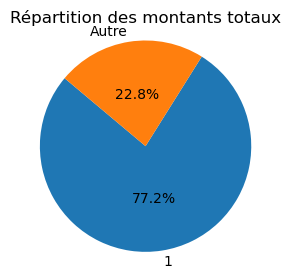

In [18]:
outlier_detection(directory_path = "1", coupure = 1)

In [32]:
df = load_dataset_2('1', 'customersplus')
df[df['id'] == 1]

id lastname firstname birthdate email  street_id  \
58201   1      NaN       NaN       NaN   NaN          2   

                             created_at                        updated_at  \
58201  2020-09-03 13:11:25.569167+02:00  2023-03-04 13:27:42.761679+01:00   

       civility  is_partner  extra  deleted_at  reference  gender  \
58201       NaN       False    NaN         NaN        NaN       2   

       is_email_true  extra_field  opt_in  structure_id note profession  \
58201           True          NaN   False           NaN  NaN        NaN   

      language  mcp_contact_id  need_reload     last_buying_date  max_price  \
58201      NaN             NaN        False  2023-11-08 03:20:07       45.0   

       ticket_sum  average_price  fidelity  average_purchase_delay  \
58201     1254775       7.030122    330831              -67.790969   

       average_price_basket  average_ticket_basket  total_price  \
58201              13.75153               1.956087    8821221.5   

       preferred_category  preferred_supplier  preferred_formula  \
58201                 NaN                 NaN                NaN   

       purchase_count          first_buying_date  last_visiting_date zipcode  \
58201          641472  2013-06-10 12:37:58+02:00                 NaN     NaN   

      country  age  tenant_id  
58201      fr  NaN       1311

File path :  projet-bdc2324-team1/0_Input/Company_2/products_purchased_reduced.csv


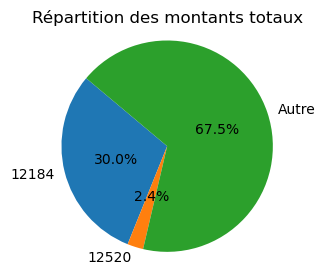

In [23]:
outlier_detection(directory_path = "2", coupure = 2)

In [33]:
df = load_dataset_2('2', 'customersplus')
df[df['id'] == 12184]

id lastname firstname birthdate email  street_id  \
170246  12184      NaN       NaN       NaN   NaN       3564   

                              created_at                        updated_at  \
170246  2023-10-12 12:25:15.438714+02:00  2023-11-09 05:14:01.944407+01:00   

        civility  is_partner  extra  deleted_at  reference  gender  \
170246       NaN       False    NaN         NaN        NaN       2   

        is_email_true  extra_field  opt_in  structure_id note profession  \
170246           True          NaN   False        1275.0  NaN        NaN   

       language  mcp_contact_id  need_reload            last_buying_date  \
170246      NaN             NaN        False  2023-11-08 19:17:50.565000   

        max_price  ticket_sum  average_price  fidelity  \
170246       75.0      512831      12.645438    197358   

        average_purchase_delay  average_price_basket  average_ticket_basket  \
170246                     0.0             31.719577               2.508381   

        total_price  preferred_category  preferred_supplier  \
170246    6484972.4                 NaN                 NaN   

        preferred_formula  purchase_count                 first_buying_date  \
170246                NaN          204447  2020-08-28 08:55:55.710000+02:00   

        last_visiting_date zipcode country  age  tenant_id  
170246                 NaN     NaN     NaN  NaN       1879

In [34]:
df.sort_values(by = 'id')

id        lastname        firstname birthdate        email  \
102639       1             NaN              NaN       NaN       email1   
224453       2             NaN       firstname2       NaN          NaN   
103013       3             NaN       firstname3       NaN          NaN   
138386       4             NaN       firstname4       NaN          NaN   
190087       5             NaN       firstname5       NaN          NaN   
...        ...             ...              ...       ...          ...   
101868  601387  lastname601387  firstname601387       NaN  email601387   
205168  601388  lastname601388  firstname601388       NaN  email601388   
67641   601389  lastname601389  firstname601389       NaN  email601389   
67639   601390  lastname601390  firstname601390       NaN  email601390   
256450  601391  lastname601391  firstname601391       NaN  email601391   

        street_id                        created_at  \
102639          1  2023-07-20 17:16:27.062822+02:00   
224453          2  2023-07-21 10:18:44.502496+02:00   
103013          3  2023-07-21 10:18:44.503913+02:00   
138386          3  2023-07-21 10:18:44.504404+02:00   
190087          3  2023-07-21 10:18:44.504841+02:00   
...           ...                               ...   
101868       3550  2023-11-09 05:13:57.358715+01:00   
205168       3550  2023-11-09 05:13:57.359234+01:00   
67641        3550  2023-11-09 05:13:57.360373+01:00   
67639        3550  2023-11-09 05:13:57.360903+01:00   
256450       3550  2023-11-09 05:13:57.361432+01:00   

                              updated_at  civility  is_partner  extra  \
102639  2023-07-20 17:16:27.074952+02:00       NaN       False    NaN   
224453  2023-07-21 10:18:44.502496+02:00       NaN       False    NaN   
103013  2023-07-21 10:18:44.503913+02:00       NaN       False    NaN   
138386  2023-07-21 10:18:44.504404+02:00       NaN       False    NaN   
190087  2023-07-21 10:18:44.504841+02:00       NaN       False    NaN   
...                                  ...       ...         ...    ...   
101868  2023-11-09 05:13:57.358715+01:00       NaN       False    NaN   
205168  2023-11-09 05:13:57.359234+01:00       NaN       False    NaN   
67641   2023-11-09 05:13:57.360373+01:00       NaN       False    NaN   
67639   2023-11-09 05:13:57.360903+01:00       NaN       False    NaN   
256450  2023-11-09 05:14:18.906054+01:00       NaN       False    NaN   

        deleted_at  reference  gender  is_email_true  extra_field  opt_in  \
102639         NaN        NaN       2           True          NaN   False   
224453         NaN        NaN       1           True          NaN   False   
103013         NaN        NaN       2           True          NaN   False   
138386         NaN        NaN       2           True          NaN   False   
190087         NaN        NaN       1           True          NaN   False   
...            ...        ...     ...            ...          ...     ...   
101868         NaN        NaN       2           True          NaN   False   
205168         NaN        NaN       2           True          NaN   False   
67641          NaN        NaN       2           True          NaN   False   
67639          NaN        NaN       0           True          NaN   False   
256450         NaN        NaN       2           True          NaN   False   

        structure_id note profession language  mcp_contact_id  need_reload  \
102639           NaN  NaN        NaN      NaN             1.0        False   
224453           NaN  NaN        NaN    josef             NaN        False   
103013           NaN  NaN        NaN  dominic             NaN        False   
138386           NaN  NaN        NaN  abigail             NaN        False   
190087           NaN  NaN        NaN   sophia             NaN        False   
...              ...  ...        ...      ...             ...          ...   
101868           NaN  NaN        NaN       de             NaN        False   
205168           NaN  NaN        NaN

File path :  projet-bdc2324-team1/0_Input/Company_3/products_purchased_reduced.csv


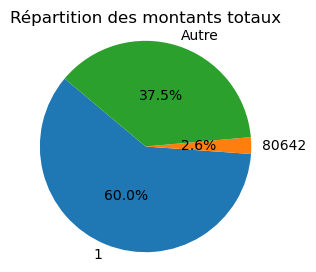

In [24]:
outlier_detection(directory_path = "3", coupure = 2)

In [36]:
df = load_dataset_2('3', 'customersplus')
df[df['id'] == 1]

id lastname firstname   birthdate email  street_id  \
105720   1      NaN       NaN  1961-12-04   NaN      91159   

                              created_at                        updated_at  \
105720  2021-03-02 15:35:40.452065+01:00  2023-11-09 01:31:07.539604+01:00   

        civility  is_partner  extra  deleted_at  reference  gender  \
105720       NaN       False    NaN         NaN        NaN       2   

        is_email_true  extra_field  opt_in  structure_id note profession  \
105720          False          NaN   False       19715.0  NaN        NaN   

        language  mcp_contact_id  need_reload     last_buying_date  max_price  \
105720       NaN             NaN        False  2023-11-06 16:57:19     7500.0   

        ticket_sum  average_price  fidelity  average_purchase_delay  \
105720     2297716      10.152196     14917           -39771.165147   

        average_price_basket  average_ticket_basket   total_price  \
105720             27.514811               2.710232  2.332686e+07   

        preferred_category  preferred_supplier  preferred_formula  \
105720                 NaN                 NaN                NaN   

        purchase_count          first_buying_date   last_visiting_date  \
105720          847793  2016-01-01 10:23:36+01:00  2023-11-06 17:12:00   

       zipcode country   age  tenant_id  
105720   13090      fr  61.0       1512

File path :  projet-bdc2324-team1/0_Input/Company_4/products_purchased_reduced.csv


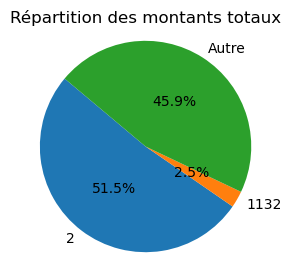

In [25]:
outlier_detection(directory_path = "4", coupure = 2)

In [37]:
df = load_dataset_2('4', 'customersplus')
df[df['id'] == 2]

id lastname firstname birthdate email  street_id  \
300754   2      NaN       NaN       NaN   NaN          2   

                              created_at                        updated_at  \
300754  2020-09-25 19:09:07.669208+02:00  2021-11-30 02:07:28.120188+01:00   

        civility  is_partner  extra  deleted_at  reference  gender  \
300754       NaN       False    NaN         NaN        NaN       2   

        is_email_true  extra_field  opt_in  structure_id note profession  \
300754          False          NaN   False           NaN  NaN        NaN   

       language  mcp_contact_id  need_reload     last_buying_date  max_price  \
300754      NaN             NaN        False  2023-11-07 16:33:09      360.0   

        ticket_sum  average_price  fidelity  average_purchase_delay  \
300754     1237224       6.056248    236850                0.015528   

        average_price_basket  average_ticket_basket  total_price  \
300754             13.493612               2.228048    7492935.0   

        preferred_category  preferred_supplier  preferred_formula  \
300754                 NaN                 NaN                NaN   

        purchase_count          first_buying_date  last_visiting_date zipcode  \
300754          555295  1901-01-01 00:09:21+00:09                 NaN     NaN   

       country  age  tenant_id  
300754     NaN  NaN       1342

File path :  projet-bdc2324-team1/0_Input/Company_101/products_purchased_reduced.csv
File path :  projet-bdc2324-team1/0_Input/Company_101/products_purchased_reduced_1.csv


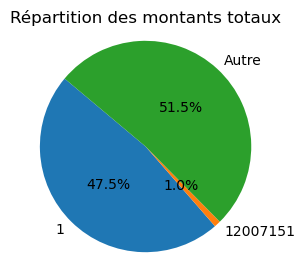

In [41]:
outlier_detection(directory_path = "101", coupure = 2)

## Evolution des commandes

In [3]:
# Importation - Chargement des données temporaires
def custom_date_parser(date_string):
    return pd.to_datetime(date_string, utc = True, format = 'ISO8601')

# Achat
BUCKET = "projet-bdc2324-team1"
FILE_KEY_S3 = "0_Input/Company_1/products_purchased_reduced.csv"
FILE_PATH_S3 = BUCKET + "/" + FILE_KEY_S3

with fs.open(FILE_PATH_S3, mode="rb") as file_in:
    purchases = pd.read_csv(file_in, sep=",", parse_dates = ['purchase_date'], date_parser=custom_date_parser)
    
# Emails
BUCKET = "projet-bdc2324-team1"
FILE_KEY_S3 = "0_Input/Company_1/campaigns_information.csv"
FILE_PATH_S3 = BUCKET + "/" + FILE_KEY_S3

with fs.open(FILE_PATH_S3, mode="rb") as file_in:
    campaigns = pd.read_csv(file_in, sep=",", parse_dates = ['sent_at'], date_parser=custom_date_parser)


/tmp/ipykernel_1235/3643128924.py:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  purchases = pd.read_csv(file_in, sep=",", parse_dates = ['purchase_date'], date_parser=custom_date_parser)
/tmp/ipykernel_1235/3643128924.py:19: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  campaigns = pd.read_csv(file_in, sep=",", parse_dates = ['sent_at'], date_parser=custom_date_parser)


In [4]:
# Mois du premier achat
purchase_min = purchases.groupby(['customer_id'])['purchase_date'].min().reset_index()
purchase_min.rename(columns = {'purchase_date' : 'first_purchase_event'}, inplace = True)
purchase_min['first_purchase_event'] = pd.to_datetime(purchase_min['first_purchase_event'])
purchase_min['first_purchase_month'] = pd.to_datetime(purchase_min['first_purchase_event'].dt.strftime('%Y-%m'))

# Mois du premier mails
first_mail_received = campaigns.groupby('customer_id')['sent_at'].min().reset_index()
first_mail_received.rename(columns = {'sent_at' : 'first_email_reception'}, inplace = True)
first_mail_received['first_email_reception'] = pd.to_datetime(first_mail_received['first_email_reception'])
first_mail_received['first_email_month'] = pd.to_datetime(first_mail_received['first_email_reception'].dt.strftime('%Y-%m'))

# Fusion 
known_customer = pd.merge(purchase_min[['customer_id', 'first_purchase_month']], 
                          first_mail_received[['customer_id', 'first_email_month']], on = 'customer_id', how = 'outer')

# Mois à partir duquel le client est considere comme connu
known_customer['known_date'] = pd.to_datetime(known_customer[['first_email_month', 'first_purchase_month']].min(axis = 1), utc = True, format = 'ISO8601')

In [5]:
# Nombre de commande par mois
purchases_count = pd.merge(purchases[['customer_id', 'purchase_id', 'purchase_date']].drop_duplicates(), known_customer[['customer_id', 'known_date']], on = ['customer_id'], how = 'inner')
purchases_count['is_customer_known'] = purchases_count['purchase_date'] > purchases_count['known_date'] + pd.DateOffset(months=1)
purchases_count['purchase_date_month'] = pd.to_datetime(purchases_count['purchase_date'].dt.strftime('%Y-%m'))
purchases_count = purchases_count[purchases_count['customer_id'] != 1]

# Nombre de commande par mois par type de client
nb_purchases_graph = purchases_count.groupby(['purchase_date_month', 'is_customer_known'])['purchase_id'].count().reset_index()
nb_purchases_graph.rename(columns = {'purchase_id' : 'nb_purchases'}, inplace = True)

nb_purchases_graph_2 = purchases_count.groupby(['purchase_date_month', 'is_customer_known'])['customer_id'].nunique().reset_index()
nb_purchases_graph_2.rename(columns = {'customer_id' : 'nb_new_customer'}, inplace = True)

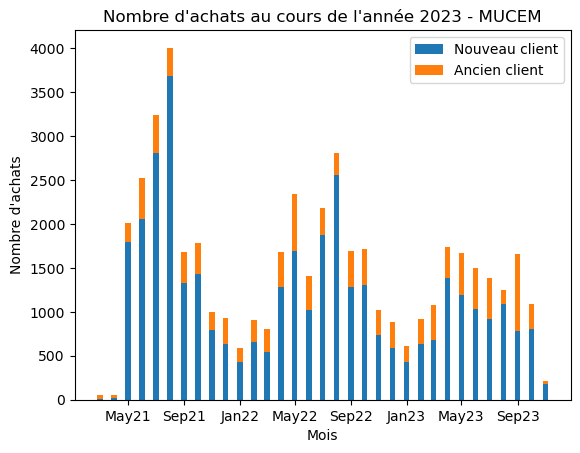

In [8]:
# Graphique en nombre de commande
purchases_graph = nb_purchases_graph

purchases_graph_used = purchases_graph[purchases_graph["purchase_date_month"] >= datetime(2021,3,1)]
purchases_graph_used_0 = purchases_graph_used[purchases_graph_used["is_customer_known"]==False]
purchases_graph_used_1 = purchases_graph_used[purchases_graph_used["is_customer_known"]==True]


# Création du barplot
plt.bar(purchases_graph_used_0["purchase_date_month"], purchases_graph_used_0["nb_purchases"], width=12, label = "Nouveau client")
plt.bar(purchases_graph_used_0["purchase_date_month"], purchases_graph_used_1["nb_purchases"], 
        bottom = purchases_graph_used_0["nb_purchases"], width=12, label = "Ancien client")


# commande pr afficher slt
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b%y'))


# Ajout de titres et d'étiquettes
plt.xlabel('Mois')
plt.ylabel("Nombre d'achats")
plt.title("Nombre d'achats - MUCEM")
plt.legend()

# Affichage du barplot
plt.show()

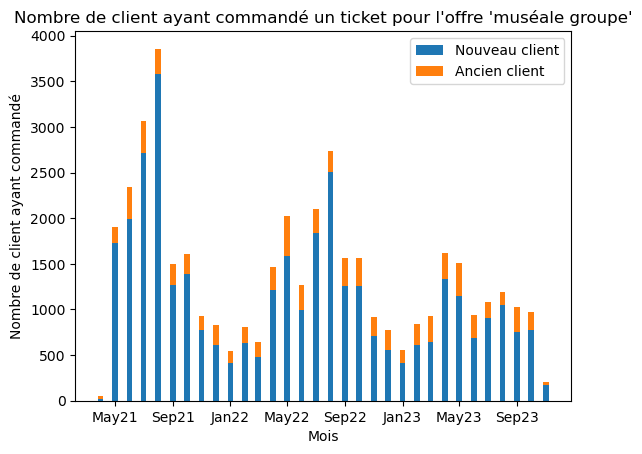

In [16]:
# graphique en nombre de client ayant commandé
purchases_graph = nb_purchases_graph_2

purchases_graph_used = purchases_graph[purchases_graph["purchase_date_month"] >= datetime(2021,4,1)]
purchases_graph_used_0 = purchases_graph_used[purchases_graph_used["is_customer_known"]==False]
purchases_graph_used_1 = purchases_graph_used[purchases_graph_used["is_customer_known"]==True]


# Création du barplot
plt.bar(purchases_graph_used_0["purchase_date_month"], purchases_graph_used_0["nb_new_customer"], width=12, label = "Nouveau client")
plt.bar(purchases_graph_used_0["purchase_date_month"], purchases_graph_used_1["nb_new_customer"], 
        bottom = purchases_graph_used_0["nb_new_customer"], width=12, label = "Ancien client")


# commande pr afficher slt
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b%y'))


# Ajout de titres et d'étiquettes
plt.xlabel('Mois')
plt.ylabel("Nombre de client ayant commandé")
plt.title("Nombre de client ayant commandé un ticket pour l'offre 'muséale groupe'")
plt.legend()

# Affichage du barplot
plt.show()

### Proportion de tickets de prix 0

In [17]:
purchases[purchases['amount'] == 0].count()/len(purchases)

ticket_id              0.418220
customer_id            0.418220
purchase_id            0.418220
event_type_id          0.418220
supplier_name          0.418220
purchase_date          0.418220
type_of_ticket_name    0.418220
amount                 0.418220
children               0.418220
is_full_price          0.418220
name_event_types       0.418220
name_facilities        0.418220
name_categories        0.402548
name_events            0.175585
name_seasons           0.418220
dtype: float64

In [18]:
purchases.groupby('customer_id')[['purchase_id', 'ticket_id']].nunique().describe()

purchase_id     ticket_id
count   73518.000000  7.351800e+04
mean       10.096167  2.484660e+01
std      2367.702603  4.636993e+03
min         1.000000  1.000000e+00
25%         1.000000  1.000000e+00
50%         1.000000  2.000000e+00
75%         1.000000  3.000000e+00
max    641981.000000  1.256574e+06

In [17]:
purchases

ticket_id  customer_id  purchase_id  event_type_id   supplier_name  \
0         13070859        48187      5107462              4  vente en ligne   
1         13070860        48187      5107462              4  vente en ligne   
2         13070861        48187      5107462              4  vente en ligne   
3         13070862        48187      5107462              4  vente en ligne   
4         13070863        48187      5107462              4  vente en ligne   
...            ...          ...          ...            ...             ...   
1826667   20662815      1256135      8007697              5  vente en ligne   
1826668   20662816      1256136      8007698              5  vente en ligne   
1826669   20662817      1256136      8007698              5  vente en ligne   
1826670   20662818      1256137      8007699              5  vente en ligne   
1826671   20662819      1256137      8007699              5  vente en ligne   

                    purchase_date type_of_ticket_name  amount  \
0       2018-12-28 14:47:50+00:00             Atelier     8.0   
1       2018-12-28 14:47:50+00:00             Atelier     4.0   
2       2018-12-28 14:47:50+00:00             Atelier     4.0   
3       2018-12-28 14:47:50+00:00             Atelier     4.0   
4       2018-12-28 14:47:50+00:00             Atelier     4.0   
...                           ...                 ...     ...   
1826667 2023-11-08 17:23:54+00:00             Atelier    11.0   
1826668 2023-11-08 18:32:18+00:00             Atelier    11.0   
1826669 2023-11-08 18:32:18+00:00             Atelier    11.0   
1826670 2023-11-08 19:30:28+00:00             Atelier    11.0   
1826671 2023-11-08 19:30:28+00:00             Atelier    11.0   

                children  is_full_price      name_event_types name_facilities  \
0        pricing_formula          False      spectacle vivant           mucem   
1        pricing_formula          False      spectacle vivant           mucem   
2        pricing_formula          False      spectacle vivant           mucem   
3        pricing_formula          False      spectacle vivant           mucem   
4        pricing_formula          False      spectacle vivant           mucem   
...                  ...            ...                   ...             ...   
1826667  pricing_formula          False  offre muséale groupe           mucem   
1826668  pricing_formula          False  offre muséale groupe           mucem   
1826669  pricing_formula          False  offre muséale groupe           mucem   
1826670  pricing_formula          False  offre muséale groupe           mucem   
1826671  pricing_formula          False  offre muséale groupe           mucem   

           name_categories            name_events  name_seasons  
0        indiv prog enfant  l'école des magiciens          2018  
1        indiv prog enfant  l'école des magiciens          2018  
2        indiv prog enfant  l'école des magiciens          2018  
3        indiv prog enfant  l'école des magiciens          2018  
4        indiv prog enfant  l'école des magiciens          2018  
...                    ...                    ...           ...  
1826667   indiv entrées tp                    NaN          2023  
1826668   indiv entrées tp                    NaN          2023  
1826669   indiv entrées tp                    NaN          2023  
1826670   indiv entrées tp                    NaN          2023  
1826671   indiv entrées tp                    NaN          2023  

[1826672 rows x 15 columns]

# 2 - Comportement d'achat bis (Alexis)

In [18]:
# Chargement des données temporaires
BUCKET = "projet-bdc2324-team1"
FILE_KEY_S3 = "0_Temp/Company 1 - customer_event.csv"
FILE_PATH_S3 = BUCKET + "/" + FILE_KEY_S3

with fs.open(FILE_PATH_S3, mode="rb") as file_in:
    customer = pd.read_csv(file_in, sep=",")

print(customer.shape)
customer.head()

(156289, 40)


customer_id birthdate  street_id  is_partner  gender  is_email_true  \
0            1       NaN          2       False       2           True   
1            1       NaN          2       False       2           True   
2            1       NaN          2       False       2           True   
3            1       NaN          2       False       2           True   
4            2       NaN          2       False       1           True   

   opt_in  structure_id profession language  ...  vente_internet_max  \
0   False           NaN        NaN      NaN  ...                 1.0   
1   False           NaN        NaN      NaN  ...                 1.0   
2   False           NaN        NaN      NaN  ...                 1.0   
3   False           NaN        NaN      NaN  ...                 1.0   
4    True           NaN        NaN      NaN  ...                 0.0   

  purchase_date_min  purchase_date_max  time_between_purchase  \
0       3262.190868           4.179306            3258.011562   
1       2502.715509        1408.715532            1093.999977   
2       3698.198229           5.221840            3692.976389   
3       3803.369792           0.146331            3803.223461   
4       1705.261192        1456.333715             248.927477   

   nb_tickets_internet          name_event_types  avg_amount  nb_campaigns  \
0                 51.0  offre muséale individuel    6.150659           NaN   
1                  5.0          formule adhésion    6.439463           NaN   
2               2988.0          spectacle vivant    7.762474           NaN   
3                  9.0      offre muséale groupe    4.452618           NaN   
4                  0.0          formule adhésion    6.439463           4.0   

   nb_campaigns_opened  time_to_open  
0                  NaN           NaN  
1                  NaN           NaN  
2                  NaN           NaN  
3                  NaN           NaN  
4                  NaN           NaN  

[5 rows x 40 columns]

In [19]:
customer.columns

Index(['customer_id', 'birthdate', 'street_id', 'is_partner', 'gender',
       'is_email_true', 'opt_in', 'structure_id', 'profession', 'language',
       'mcp_contact_id', 'last_buying_date', 'max_price', 'ticket_sum',
       'average_price', 'fidelity', 'average_purchase_delay',
       'average_price_basket', 'average_ticket_basket', 'total_price',
       'purchase_count', 'first_buying_date', 'country', 'age', 'tenant_id',
       'event_type_id', 'nb_tickets', 'nb_purchases', 'total_amount',
       'nb_suppliers', 'vente_internet_max', 'purchase_date_min',
       'purchase_date_max', 'time_between_purchase', 'nb_tickets_internet',
       'name_event_types', 'avg_amount', 'nb_campaigns', 'nb_campaigns_opened',
       'time_to_open'],
      dtype='object')

In [20]:
achat = ['customer_id', 'average_price', 'average_purchase_delay', 'average_price_basket',
          'average_ticket_basket', 'purchase_count', 'total_price', 'nb_campaigns',
         'nb_campaigns_opened']

customer_achat = customer[achat].drop_duplicates(subset = ['customer_id'])
customer_achat['nb_campaigns'] = customer_achat['nb_campaigns'].fillna(0)
customer_achat['nb_campaigns_opened'] = customer_achat['nb_campaigns_opened'].fillna(0)
customer_achat = customer_achat.fillna(0)
customer_achat.head()

customer_id  average_price  average_purchase_delay  average_price_basket  \
0            1       7.030122              -67.790969             13.751530   
4            2       0.000000                0.000000              0.000000   
6            3      18.333333               30.666667             36.666667   
7            4      10.250000                5.000000             20.500000   
9            5       9.500000                0.000000             19.000000   

   average_ticket_basket  purchase_count  total_price  nb_campaigns  \
0               1.956087          641472    8821221.5           0.0   
4               1.000000             307          0.0           4.0   
6               2.000000               3        110.0         222.0   
7               2.000000               2         41.0           7.0   
9               2.000000               1         19.0           4.0   

   nb_campaigns_opened  
0                  0.0  
4                  0.0  
6                124.0  
7                  7.0  
9                  0.0

In [21]:
customer_wto_outlier = customer_achat[customer_achat['customer_id']!=1]

customer_wto_outlier[['average_price', 'average_purchase_delay', 'average_price_basket',
          'average_ticket_basket', 'purchase_count', 'total_price', 'nb_campaigns', 'nb_campaigns_opened']].describe()

average_price  average_purchase_delay  average_price_basket  \
count  151865.000000           151865.000000         151865.000000   
mean        5.252070             -206.581486             11.451596   
std         7.915955             2996.743657             48.271194   
min         0.000000           -44863.000000              0.000000   
25%         0.000000                0.000000              0.000000   
50%         0.000000                0.000000              0.000000   
75%        11.000000                0.000000             19.000000   
max       320.000000             1914.000000           9900.000000   

       average_ticket_basket  purchase_count    total_price   nb_campaigns  \
count          151865.000000   151865.000000  151865.000000  151865.000000   
mean                1.723372        0.655148      16.994064      40.923241   
std                 7.045950        5.694038     313.099102      70.445724   
min                 0.000000        0.000000       0.000000       0.000000   
25%                 0.000000        0.000000       0.000000       2.000000   
50%                 0.000000        0.000000       0.000000       5.000000   
75%                 2.000000        1.000000      20.000000      32.000000   
max               900.000000     1508.000000   64350.000000     439.000000   

       nb_campaigns_opened  
count        151865.000000  
mean              7.870681  
std              23.119061  
min               0.000000  
25%               0.000000  
50%               1.000000  
75%               3.000000  
max             434.000000

# Event

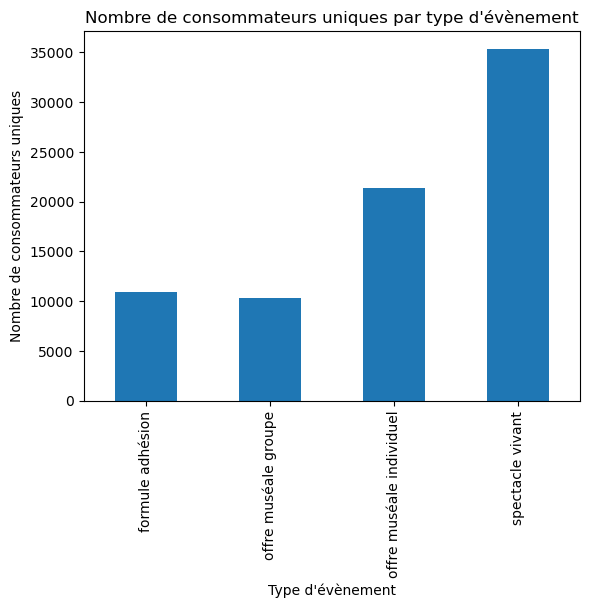

In [22]:
# Nombre de consommateurs uniques par type d'évènement

event_counts = customer.groupby('name_event_types')['customer_id'].nunique()

event_counts.plot(kind='bar')
plt.xlabel("Type d'évènement")
plt.ylabel('Nombre de consommateurs uniques')
plt.title("Nombre de consommateurs uniques par type d'évènement")
plt.show()

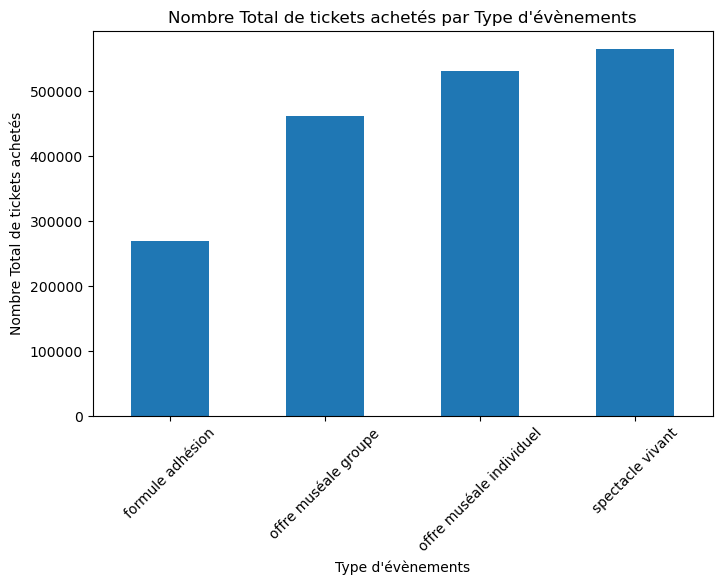

In [23]:
# Nombre Total de tickets achetés par Type d'évènements

total_tickets_by_event = customer.groupby('name_event_types')['nb_tickets'].sum()

total_tickets_by_event.plot(kind='bar', figsize=(8, 5))
plt.xlabel("Type d'évènements")
plt.ylabel('Nombre Total de tickets achetés')
plt.title("Nombre Total de tickets achetés par Type d'évènements")
plt.xticks(rotation=45)
plt.show()

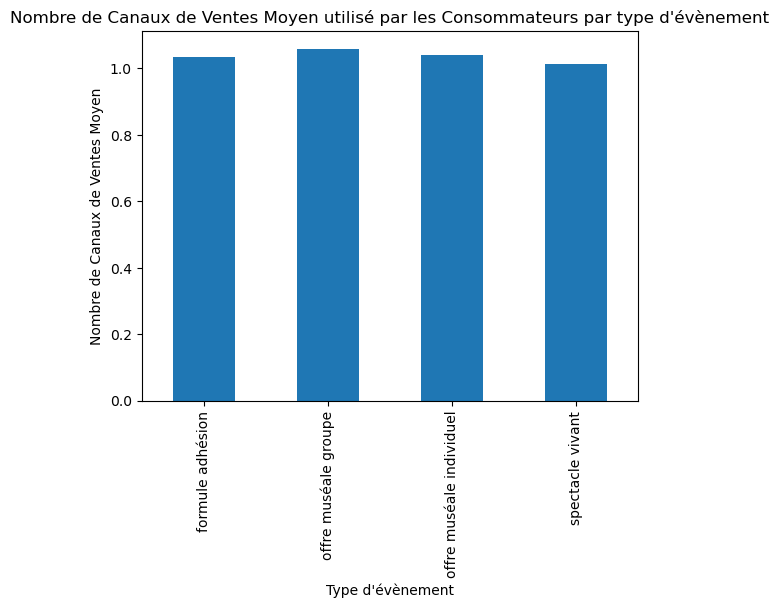

In [24]:
# Nombre de Canaux de Ventes Moyen utilisé par les Consommateurs par type d'évènement

avg_supp_event = customer.groupby('name_event_types')['nb_suppliers'].mean()
avg_supp_event.plot(kind='bar')
plt.xlabel("Type d'évènement")
plt.ylabel('Nombre de Canaux de Ventes Moyen')
plt.title("Nombre de Canaux de Ventes Moyen utilisé par les Consommateurs par type d'évènement")
plt.show()

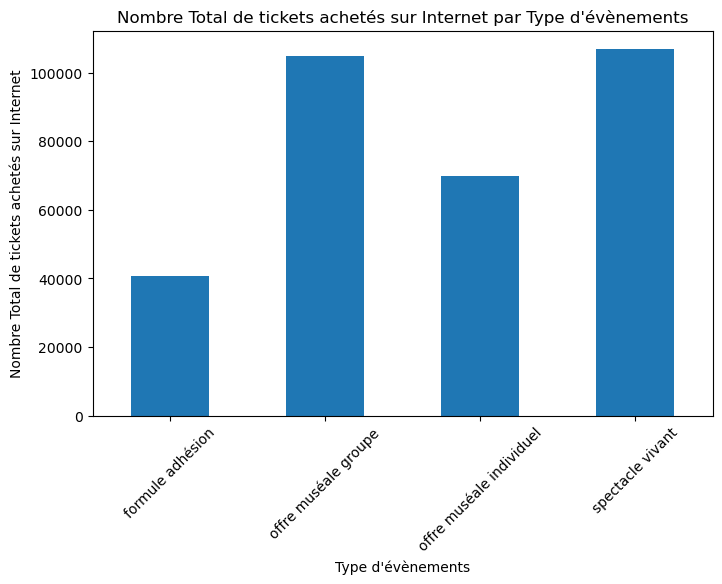

In [25]:
# Nombre Total de tickets achetés sur Internet par Type d'évènements

nb_tickets_internet = customer.groupby('name_event_types')['nb_tickets_internet'].sum()
nb_tickets_internet.plot(kind='bar', figsize=(8, 5))
plt.xlabel("Type d'évènements")
plt.ylabel('Nombre Total de tickets achetés sur Internet')
plt.title("Nombre Total de tickets achetés sur Internet par Type d'évènements")
plt.xticks(rotation=45)
plt.show()

# 3 - Caractéristiques Démographiques (peu exploitable)

In [26]:
customer.columns

Index(['customer_id', 'birthdate', 'street_id', 'is_partner', 'gender',
       'is_email_true', 'opt_in', 'structure_id', 'profession', 'language',
       'mcp_contact_id', 'last_buying_date', 'max_price', 'ticket_sum',
       'average_price', 'fidelity', 'average_purchase_delay',
       'average_price_basket', 'average_ticket_basket', 'total_price',
       'purchase_count', 'first_buying_date', 'country', 'age', 'tenant_id',
       'event_type_id', 'nb_tickets', 'nb_purchases', 'total_amount',
       'nb_suppliers', 'vente_internet_max', 'purchase_date_min',
       'purchase_date_max', 'time_between_purchase', 'nb_tickets_internet',
       'name_event_types', 'avg_amount', 'nb_campaigns', 'nb_campaigns_opened',
       'time_to_open'],
      dtype='object')

In [27]:
def percent_of_na(df, column):
    na_percentage = df[column].isna().mean() * 100
    non_na_percentage = 100 - na_percentage
    
    labels = ['Valeurs Manquantes', 'Non-Valeurs Manquantes']
    sizes = [na_percentage, non_na_percentage]
    colors = ['#ff9999','#66b3ff']
    explode = (0.1, 0)

    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.axis('equal') 
    plt.title('Pourcentage de Valeurs Manquantes : {}'.format(column))
    plt.show()

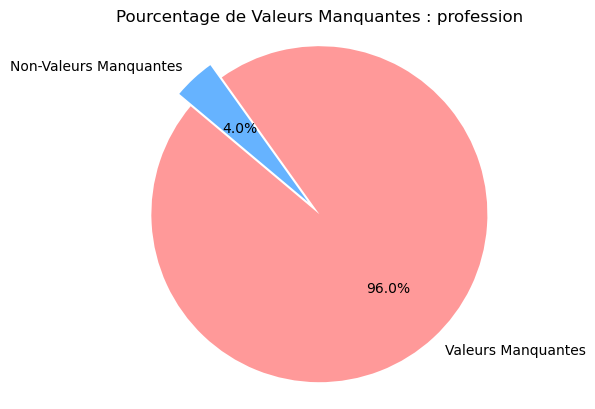

In [28]:
percent_of_na(customer, 'profession')

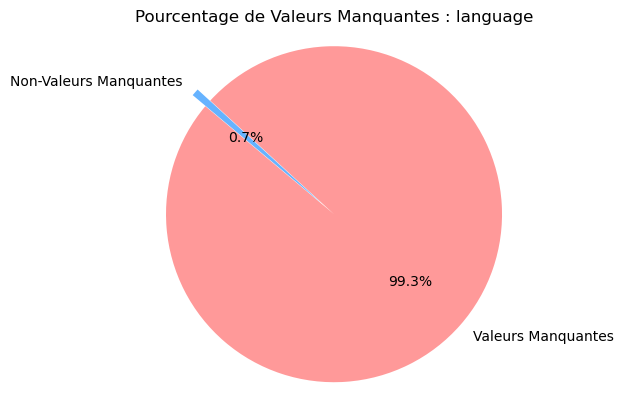

In [29]:
percent_of_na(customer, 'language')